## Cleaning

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
df_rev = pd.read_csv('../../small_business/data/reviews2.csv')
df_rest = pd.read_csv('../../small_business/data/restaurants.csv')
print(df_rev.shape)
print(df_rest.shape)

(110057, 6)
(652, 19)


In [147]:
df_rev.drop_duplicates(inplace=True)

In [148]:
print(df_rev.shape)
print(df_rest.shape)

(106695, 6)
(652, 19)


In [149]:
list_rest = list(df_rest['name'])
list_rev = list(df_rev['restaurant_name'].unique())

common_rest = []

for k,v in enumerate(list_rest):
    if v in list_rev:
        common_rest.append(v)
        
len(common_rest)

645

In [150]:
df_rev

,index,restaurant_name,comment_names,comment_ratings,comment_dates,comment_comments
0,0,Augusto Lisboa,Lee Bradshaw,"Rated 5.0 out of 5,",2 weeks ago,Well worth the small wait to get in of around ...
1,1,Augusto Lisboa,Joel Moralez,"Rated 5.0 out of 5,",5 days ago,Two words: Homemade excellence. This place set...
2,2,Augusto Lisboa,Carolyn Brosious,"Rated 5.0 out of 5,",6 days ago,"Chic vibe, excellent service, and delicious fo..."
3,3,Augusto Lisboa,D,"Rated 5.0 out of 5,",2 weeks ago,Some of the best brunch I’ve had! Cheery and c...
4,4,Augusto Lisboa,Joy Parpan,"Rated 4.0 out of 5,",a week ago,Love the avocado toast! Best cappuccino and th...
...,...,...,...,...,...,...
110052,91,Radia Jabroni,Yarden Lavi,"Rated 5.0 out of 5,",3 months ago,NaN
110053,92,Radia Jabroni,Luís “Luís Rato” Rato,"Rated 5.0 out of 5,",3 months ago,NaN
110054,93,Radia Jabroni,Simone Vittorio,"Rated 5.0 out of 5,",a year ago,NaN
110055,94,Radia Jabroni,Cristóvão Valente Pereira,"Rated 4.0 out of 5,",a month ago,NaN


In [151]:
df_rev.drop(columns='index', inplace=True)

In [152]:
df_rest.rename(columns={'name':'restaurant_name'}, inplace=True)

In [153]:
df_merged = df_rev.merge(df_rest, how='left', on='restaurant_name')

In [154]:
df_merged.drop(columns='Unnamed: 0', inplace=True)

In [155]:
df_merged.dropna(inplace=True)

In [156]:
df_merged.head(2)

,restaurant_name,comment_names,comment_ratings,comment_dates,comment_comments,type,rating,review_count,price,address,...,longitude,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code,municipality,neighborhood
0,Augusto Lisboa,Lee Bradshaw,"Rated 5.0 out of 5,",2 weeks ago,Well worth the small wait to get in of around ...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça
1,Augusto Lisboa,Lee Bradshaw,"Rated 5.0 out of 5,",2 weeks ago,Well worth the small wait to get in of around ...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça


In [157]:
dueb = ['há', 
        'uma', 
        'um', 
        'semana', 
        'semanas', 
        'meses', 
        'mês', 
        'minutos', 
        'minuto', 
        'dias', 
        'dia', 
        'horas', 
        'hora', 
        'anos', 
        'ano']

df_merged['comment_dates'].unique()

array(['2 weeks ago', '5 days ago', '6 days ago', 'a week ago',
       '3 weeks ago', '2 months ago', 'a month ago', '2 days ago',
       '3 months ago', '5 months ago', '3 days ago', '6 months ago',
       '4 months ago', 'a year ago', '4 days ago', '2 years ago',
       '11 months ago', '4 years ago', '10 months ago', '7 months ago',
       '8 months ago', '4 weeks ago', '3 years ago', '5 years ago',
       'a day ago', '6 years ago', '9 months ago', '9 years ago',
       '10 years ago', '8 years ago', '7 years ago', '11 years ago',
       '23 hours ago', '3 hours ago', '19 hours ago', '22 hours ago',
       '11 hours ago', '6 hours ago', 'há uma semana', 'há 2 meses',
       'há 3 meses', 'há 5 meses', 'há um mês', 'há 2 semanas',
       'há 3 semanas', 'há 10 meses', 'há 2 anos', 'há um ano',
       'há 3 anos', 'há 4 meses', 'há 4 anos', 'há 4 semanas',
       'há 5 anos', 'há um dia', 'há 7 meses', 'há 6 meses', 'há 8 meses',
       'há 11 meses', 'há 9 meses', 'há 4 dias', 'há 8

In [158]:
df_merged['comment_ratings'] = df_merged['comment_ratings'].map(lambda x : x.replace('Classificação: ','Rated ').replace('de','out of').replace(',','.'))
df_merged['comment_dates'] = df_merged['comment_dates'].map(lambda x : x.replace('há ','')
                                                                  .replace('uma','a')
                                                                  .replace('um','a')
                                                                  .replace('semanas', 'weeks')
                                                                  .replace('semana', 'week')
                                                                  .replace('meses', 'months')
                                                                  .replace('mês', 'month')
                                                                  .replace('minutos', 'minutes')
                                                                  .replace('minuto', 'minute')
                                                                  .replace('dias', 'days')
                                                                  .replace('dia', 'day')
                                                                  .replace('horas', 'hours')
                                                                  .replace('hora', 'hour')
                                                                  .replace('anos', 'years')
                                                                  .replace('ano','year') + ' ago' if any(w in x for w in dueb) else x)
df_rev

,restaurant_name,comment_names,comment_ratings,comment_dates,comment_comments
0,Augusto Lisboa,Lee Bradshaw,"Rated 5.0 out of 5,",2 weeks ago,Well worth the small wait to get in of around ...
1,Augusto Lisboa,Joel Moralez,"Rated 5.0 out of 5,",5 days ago,Two words: Homemade excellence. This place set...
2,Augusto Lisboa,Carolyn Brosious,"Rated 5.0 out of 5,",6 days ago,"Chic vibe, excellent service, and delicious fo..."
3,Augusto Lisboa,D,"Rated 5.0 out of 5,",2 weeks ago,Some of the best brunch I’ve had! Cheery and c...
4,Augusto Lisboa,Joy Parpan,"Rated 4.0 out of 5,",a week ago,Love the avocado toast! Best cappuccino and th...
...,...,...,...,...,...
110052,Radia Jabroni,Yarden Lavi,"Rated 5.0 out of 5,",3 months ago,NaN
110053,Radia Jabroni,Luís “Luís Rato” Rato,"Rated 5.0 out of 5,",3 months ago,NaN
110054,Radia Jabroni,Simone Vittorio,"Rated 5.0 out of 5,",a year ago,NaN
110055,Radia Jabroni,Cristóvão Valente Pereira,"Rated 4.0 out of 5,",a month ago,NaN


In [159]:
df_merged['comment_dates'].unique()

array(['2 weeks ago', '5 days ago', '6 days ago', 'a week ago',
       '3 weeks ago', '2 months ago', 'a month ago', '2 days ago',
       '3 months ago', '5 months ago', '3 days ago', '6 months ago',
       '4 months ago', 'a year ago', '4 days ago', '2 years ago',
       '11 months ago', '4 years ago', '10 months ago', '7 months ago',
       '8 months ago', '4 weeks ago', '3 years ago', '5 years ago',
       'a day ago', '6 years ago', '9 months ago', '9 years ago',
       '10 years ago', '8 years ago', '7 years ago', '11 years ago',
       '23 hours ago', '3 hours ago', '19 hours ago', '22 hours ago',
       '11 hours ago', '6 hours ago', '46 minutes ago', '2 hours ago',
       '18 hours ago', '20 hours ago', '7 hours ago', 'an hour ago',
       '21 hours ago'], dtype=object)

In [160]:
df_merged.head(2)

,restaurant_name,comment_names,comment_ratings,comment_dates,comment_comments,type,rating,review_count,price,address,...,longitude,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code,municipality,neighborhood
0,Augusto Lisboa,Lee Bradshaw,Rated 5.0 out of 5.,2 weeks ago,Well worth the small wait to get in of around ...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça
1,Augusto Lisboa,Lee Bradshaw,Rated 5.0 out of 5.,2 weeks ago,Well worth the small wait to get in of around ...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça


In [161]:
def clean_comment_dates(text):
    text = text.replace("ago","")
    text = text.replace("s","")
    text = text.replace(" day","*1")
    text = text.replace(" week","*7")
    text = text.replace(" month","*30")
    text = text.replace(" year","*365")
    text = text.replace(" ano","*365")
    if "minute" in text or  "hour" in text:
        text = "1"
    if "a" in text:
        text = text.replace("a", "1")
    return eval(text)

In [162]:
df_merged.comment_dates = df_merged.comment_dates.apply(clean_comment_dates)

In [163]:
df_merged.comment_ratings = df_merged.comment_ratings.map(lambda x : int(str(x).replace('Rated ', '').replace('.0 out of 5.', '')))

In [164]:
df_merged.drop_duplicates(inplace=True)
df_merged.head()

,restaurant_name,comment_names,comment_ratings,comment_dates,comment_comments,type,rating,review_count,price,address,...,longitude,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code,municipality,neighborhood
0,Augusto Lisboa,Lee Bradshaw,5,14,Well worth the small wait to get in of around ...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça
2,Augusto Lisboa,Joel Moralez,5,5,Two words: Homemade excellence. This place set...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça
4,Augusto Lisboa,Carolyn Brosious,5,6,"Chic vibe, excellent service, and delicious fo...",brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça
6,Augusto Lisboa,D,5,14,Some of the best brunch I’ve had! Cheery and c...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça
8,Augusto Lisboa,Joy Parpan,4,7,Love the avocado toast! Best cappuccino and th...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,-9.130176,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça


In [165]:
from datetime import datetime
from datetime import timedelta


def change_dates(x):
    new_date = datetime.now() - timedelta(days=x)
    return pd.to_datetime(new_date)

In [166]:
df_merged.comment_dates = df_merged.comment_dates.map(lambda x : change_dates(x))

In [167]:
df_merged['year'] = df_merged['comment_dates'].map(lambda x : x.year)

In [168]:
def remove_google_trans_comment(series):
    if "(Translated by Google)" in series:
        return series.replace("(Translated by Google) ","")
#    elif "(Translated by Google)" in series:
#        return series.replace("(Translated by Google) ","")
    else:
        return series

In [169]:
def remove_original_translation(series):
    if "\n\n(Original)" in series:
        index = series.find("\n\n(Original)")
        return series[:index]
    else:
        return series

In [170]:
df_merged.comment_comments = df_merged.comment_comments.apply(remove_google_trans_comment)
df_merged.comment_comments = df_merged.comment_comments.apply(remove_original_translation)

from textblob import TextBlob
import time

lang = []

for i in range(0, len(df_merged['comment_comments']), 1000):
    lang.append(df_merged.loc[:100].comment_comments.map(lambda x: TextBlob(x).detect_language()))

In [171]:
df_merged

,restaurant_name,comment_names,comment_ratings,comment_dates,comment_comments,type,rating,review_count,price,address,...,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code,municipality,neighborhood,year
0,Augusto Lisboa,Lee Bradshaw,5,2021-11-18 19:43:29.502861,Well worth the small wait to get in of around ...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça,2021
2,Augusto Lisboa,Joel Moralez,5,2021-11-27 19:43:29.503279,Two words: Homemade excellence. This place set...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça,2021
4,Augusto Lisboa,Carolyn Brosious,5,2021-11-26 19:43:29.503416,"Chic vibe, excellent service, and delicious fo...",brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça,2021
6,Augusto Lisboa,D,5,2021-11-18 19:43:29.503578,Some of the best brunch I’ve had! Cheery and c...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça,2021
8,Augusto Lisboa,Joy Parpan,4,2021-11-25 19:43:29.503708,Love the avocado toast! Best cappuccino and th...,brunch,4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal",...,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107120,El Tacos Mexican & Cocktails Bar ( Bairro Alto),Miguel Rodrigues,3,2020-12-02 19:43:35.695068,Humble place but with very nice people where w...,mexican,3.9,431.0,2.0,"R. do Diário de Notícias 23, 1200-283 Lisboa, ...",...,1.0,1.0,1.0,0.0,0.0,0.0,1200-283,Lisboa,Encarnação,2020
107121,El Tacos Mexican & Cocktails Bar ( Bairro Alto),Sandra Sanches,5,2020-12-02 19:43:35.695152,"Excellent experience, great food, exceptional ...",mexican,3.9,431.0,2.0,"R. do Diário de Notícias 23, 1200-283 Lisboa, ...",...,1.0,1.0,1.0,0.0,0.0,0.0,1200-283,Lisboa,Encarnação,2020
107122,El Tacos Mexican & Cocktails Bar ( Bairro Alto),Dário Cardoso,5,2020-12-02 19:43:35.695235,Great food. Super cozy place. Live Fado. Every...,mexican,3.9,431.0,2.0,"R. do Diário de Notícias 23, 1200-283 Lisboa, ...",...,1.0,1.0,1.0,0.0,0.0,0.0,1200-283,Lisboa,Encarnação,2020
107123,El Tacos Mexican & Cocktails Bar ( Bairro Alto),Lola Gella Mayné,5,2019-12-03 19:43:35.695318,"A pleasant surprise! Very good food, reasonabl...",mexican,3.9,431.0,2.0,"R. do Diário de Notícias 23, 1200-283 Lisboa, ...",...,1.0,1.0,1.0,0.0,0.0,0.0,1200-283,Lisboa,Encarnação,2019


In [172]:
from google_trans_new import google_translator
import pandas as pd
#note source code in google_trans_new needs to be updated. Ask me how!

def translate(x):
    translator = google_translator()
    detect_result = translator.detect(x)
    if detect_result[0] != 'en':
        x = translator.translate(x, lang_src = "auto", lang_tgt = "en")
        print(x)
    return x

In [173]:
df_merged['comment_comments'] = df_merged['comment_comments'].map(lambda x : translate(x))

google_new_transError: 500 (Internal Server Error) from TTS API. Probable cause: Uptream API error. Try again later.

In [ ]:
list(df_merged.columns)

In [ ]:
data = df_merged[[
    'restaurant_name',
    'comment_names',
    'comment_ratings',
    'comment_dates',
    'year',
    'comment_comments',
    'type',
    'rating',
    'review_count',
    'price',
    'address',
    'label',
    'latitude',
    'longitude',
    'dine_in',
    'takeaway',
    'delivery',
    'drive_through',
    'no_del_exp',
    'curb_pickup',
    'postal_code',
    'municipality',
    'neighborhood'
]]

In [ ]:
data

In [ ]:
data.to_csv('../small_business/data/reviews.csv')

## Exploratory

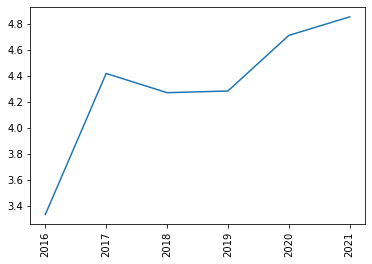

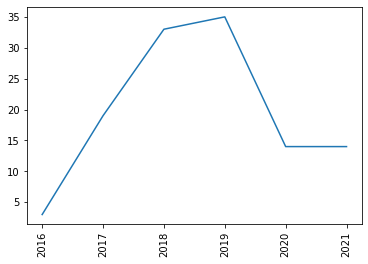

In [17]:
restaurant = "Salsa"

plt.figure()
plt.plot(df_rev[df_rev['restaurant_name'] == restaurant].groupby('year').agg({'comment_ratings':'mean'}))
plt.xticks(rotation = 90)
plt.figure()
plt.plot(df_rev[df_rev['restaurant_name'] == restaurant].groupby('year').agg({'restaurant_name':'count'}))
plt.xticks(rotation = 90);